In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [122]:
df = pd.read_csv('https://datapolitan-training-files.s3.amazonaws.com/20200311_Police_Incidents.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (52,57,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
df.head()

,Incident Number w/year,Year of Incident,Service Number ID,Watch,Call (911) Problem,Type of Incident,Type Location,Type of Property,Incident Address,Apartment Number,...,NIBRS Code,NIBRS Group,NIBRS Type,Update Date,X Coordinate,Y Cordinate,Zip Code,City,State,Location1
0,011228-2019,2019,011228-2019-01,2,42 - CHASE,EVADING ARREST DETENTION W/VEHICLE PC38.04(b)(...,"Highway, Street, Alley ETC",NaN,669 AIRPORT FWY,NaN,...,90Z,B,No Coded,2019-01-24 14:38:00.0000000,NaN,NaN,75215.0,HURST,TX,"669 AIRPORT FWY\nHURST, TX 75215\n(32.839234, ..."
1,239093-2017,2017,239093-2017-01,1,58 - ROUTINE INVESTIGATION,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,"Highway, Street, Alley ETC",NaN,805 WAYNE ST,NaN,...,240,A,Coded,2017-11-02 11:39:10.0000000,2.506228e+06,6.977340e+06,75223.0,DALLAS,TX,"805 WAYNE ST\nDALLAS, TX 75223\n(32.797091, -9..."
2,805588-2019,2019,805588-2019-01,1,NaN,BMV,Apartment Residence,NaN,3033 ROUTH ST,401,...,23F,A,Coded,2019-11-21 16:00:14.0000000,2.488953e+06,6.978045e+06,75201.0,DALLAS,NaN,"3033 ROUTH ST\nDALLAS 75201\n(32.799756, -96.8..."
3,197968-2019,2019,197968-2019-01,3,09V-01 UUMV JUST OCRD,UNAUTHORIZED USE OF MOTOR VEH - AUTOMOBILE,Convenience Store,NaN,2903 ROYAL LN,NaN,...,240,A,Coded,2020-01-16 14:31:50.0000000,2.465343e+06,7.012478e+06,75229.0,DALLAS,TX,"2903 ROYAL LN\nDALLAS, TX 75229\n(32.895218, -..."
4,804014-2019,2019,804014-2019-01,1,NaN,LOST PROPERTY (NO OFFENSE),Outdoor Area Public/Private,NaN,2828 LACLEDE ST,APT 405,...,999,C,No Coded,2019-10-11 05:51:49.0000000,2.490102e+06,6.978437e+06,75204.0,DALLAS,TX,"2828 LACLEDE ST\nDALLAS, TX 75204\n(32.800695,..."


In [124]:
df.shape

(620848, 100)

In [21]:
df.columns

Index(['Incident Number w/year', 'Year of Incident', 'Service Number ID',
       'Watch', 'Call (911) Problem', 'Type of Incident', 'Type  Location',
       'Type of Property', 'Incident Address', 'Apartment Number',
       'Reporting Area', 'Beat', 'Division', 'Sector', 'Council District',
       'Target Area Action Grids', 'Community', 'Date1 of Occurrence',
       'Year1 of Occurrence', 'Month1 of Occurence', 'Day1 of the Week',
       'Time1 of Occurrence', 'Day1 of the Year', 'Date2 of Occurrence ',
       'Year2 of Occurrence', 'Month2 of Occurence', 'Day2 of the Week',
       'Time2 of Occurrence', 'Day2 of the Year', 'Date of Report',
       'Date incident created', 'Offense Entered Year',
       'Offense Entered Month', 'Offense Entered Day of the Week',
       'Offense Entered Time', 'Offense Entered  Date/Time', 'CFS Number',
       'Call Received Date Time', 'Call Date Time', 'Call Cleared Date Time',
       'Call Dispatch Date Time', 'Special Report (Pre-RMS)',
       'Per

## check the timeframe

In [7]:
date_cols = ['Year of Incident',\
             'Date1 of Occurrence','Time1 of Occurrence',\
             'Date2 of Occurrence ','Time2 of Occurrence',\
             'Date of Report','Date incident created',\
             'Offense Entered Year','Offense Entered Month', 'Offense Entered Day of the Week',\
             'Offense Entered Time', 'Offense Entered  Date/Time',\
             'Call Received Date Time','Call Date Time', 'Call Cleared Date Time','Call Dispatch Date Time']

In [8]:
df_date = df[date_cols]

In [9]:
df_date.head()

,Year of Incident,Date1 of Occurrence,Time1 of Occurrence,Date2 of Occurrence,Time2 of Occurrence,Date of Report,Date incident created,Offense Entered Year,Offense Entered Month,Offense Entered Day of the Week,Offense Entered Time,Offense Entered Date/Time,Call Received Date Time,Call Date Time,Call Cleared Date Time,Call Dispatch Date Time
0,2019,01/17/2019,10:41,01/17/2019,11:16,01/17/2019 02:56:00 PM,01/17/2019 11:39:32 AM,2019,January,Thu,11:39,17,01/17/2019 10:44:19 AM,01/17/2019 10:44:19 AM,01/17/2019 06:22:46 PM,01/17/2019 10:44:19 AM
1,2017,10/23/2017,15:00,10/23/2017,17:00,10/24/2017 12:30:00 PM,10/19/2017 10:00:22 AM,2017,October,Thu,10:00,292,10/19/2017 09:58:50 AM,10/19/2017 09:58:50 AM,10/19/2017 09:59:43 AM,10/19/2017 09:58:50 AM
2,2019,11/20/2019,07:35,11/20/2019,07:35,11/20/2019 08:02:20 AM,11/20/2019 11:25:26 AM,2019,November,Wed,11:25,324,NaN,NaN,NaN,NaN
3,2019,09/28/2019,21:25,09/28/2019,22:04,09/28/2019 10:15:00 PM,09/28/2019 11:34:19 PM,2019,September,Sat,23:34,271,09/28/2019 10:04:06 PM,09/28/2019 10:04:05 PM,09/29/2019 12:16:43 AM,09/28/2019 10:15:24 PM
4,2019,10/08/2019,17:00,10/09/2019,10:20,10/09/2019 10:30:08 AM,10/09/2019 12:20:59 PM,2019,October,Wed,12:20,282,NaN,NaN,NaN,NaN


In [10]:
df_date['Date incident created'].max()

'12/31/2019 12:59:19 AM'

In [11]:
df_date['Date incident created'].min()

'01/01/2015 01:00:11 AM'

In [12]:
df_date['created_date_format'] = df_date['Date incident created'].apply(lambda x:pd.to_datetime(x))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Number of Incidents Created in RMS')

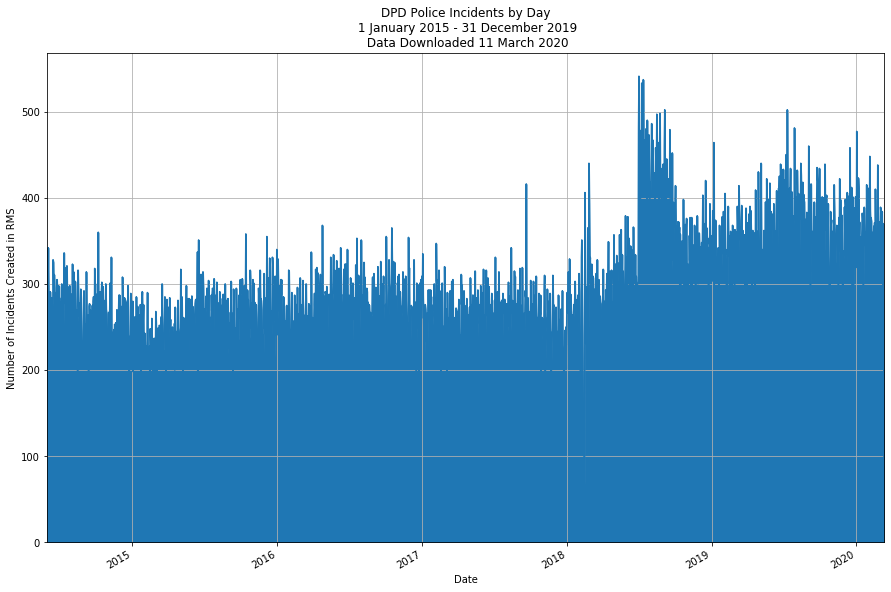

In [15]:
ax = df_date.groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count()\
.plot(kind='area',figsize=(15,10),grid=True,title='DPD Police Incidents by Day\n 1 January 2015 - 31 December 2019\n Data Downloaded 11 March 2020')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Incidents Created in RMS')

In [16]:
df_date[(df_date['created_date_format']>='2015-01-01T00:00:00')&(df_date['created_date_format']<='2019-12-31T23:59:59')].count()

Year of Incident                   539186
Date1 of Occurrence                539186
Time1 of Occurrence                539186
Date2 of Occurrence                539186
Time2 of Occurrence                539186
Date of Report                     539186
Date incident created              539186
Offense Entered Year               539186
Offense Entered Month              539186
Offense Entered Day of the Week    539186
Offense Entered Time               539186
Offense Entered  Date/Time         539186
Call Received Date Time            530737
Call Date Time                     530737
Call Cleared Date Time             530503
Call Dispatch Date Time            530672
created_date_format                539186
dtype: int64

## Explore the Discrepancies with the Numbers (vice 6 May 2020 download)

In [40]:
# Create dateframe of daily counts
df_day_ct = df_date.groupby(df_date['created_date_format'].dt.normalize())['Date of Report'].count()

In [54]:
df_day_ct = df_day_ct.rename('Incident_Created_Count_11March')

In [44]:
## bring in other dataframe
df_date_ct_6May = pd.read_pickle('../data/20200506_df_date_ct.p')

In [52]:
df_date_ct_6May = df_date_ct_6May.rename('Incident_Created_Count_6May')

In [53]:
df_date_ct_6May.head()

created_date_format
2014-06-01    21
2014-06-02    27
2014-06-03    21
2014-06-04    22
2014-06-05    16
Name: Incident_Created_Count_6May, dtype: int64

**Difference by Days**

In [55]:
# new df indexed on day, count A, count B, delta
df_day_ct_comp = pd.concat([df_day_ct,df_date_ct_6May], axis=1)

In [67]:
# trimming the NaN for those counts after march 11th
df_day_ct_comp = df_day_ct_comp.loc['2014-06-01':'2020-03-10']

In [85]:
df_day_ct_comp['count_diff'] = \
(df_day_ct_comp.Incident_Created_Count_11March - df_day_ct_comp.Incident_Created_Count_6May).abs()

In [86]:
df_day_ct_comp.head()

,Incident_Created_Count_11March,Incident_Created_Count_6May,count_diff
created_date_format,,,
2014-06-01,177.0,21,156.0
2014-06-02,257.0,27,230.0
2014-06-03,304.0,21,283.0
2014-06-04,342.0,22,320.0
2014-06-05,286.0,16,270.0


Text(0, 0.5, 'Number of Incidents Created')

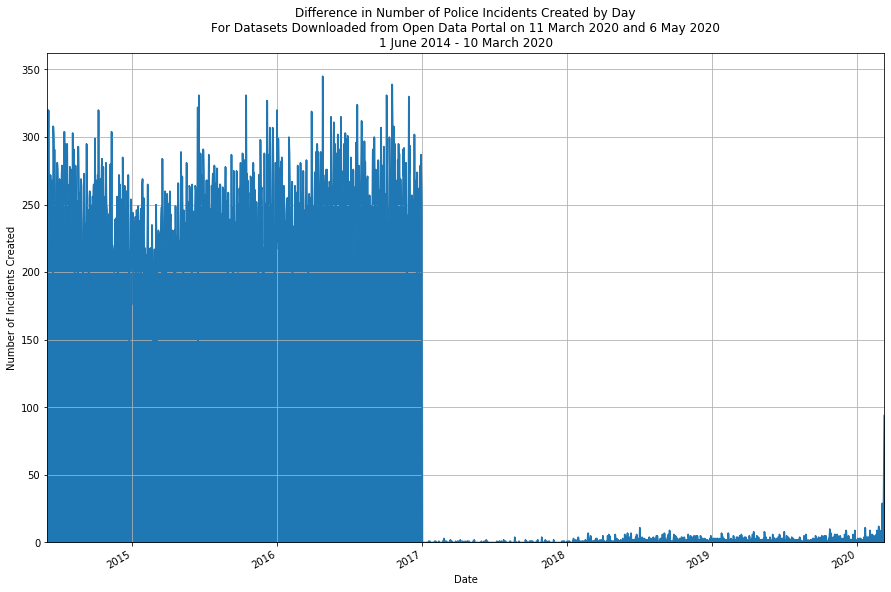

In [107]:
ax = df_day_ct_comp['count_diff'].plot(kind='area',\
                                       figsize=(15,10),\
                                       grid=True,\
                                  title='Difference in Number of Police Incidents Created by Day\nFor Datasets Downloaded from Open Data Portal on 11 March 2020 and 6 May 2020\n1 June 2014 - 10 March 2020')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Incidents Created')

**Confirm Break Point**

In [89]:
df_day_ct_comp.loc['2016-12-15':'2017-01-15']

,Incident_Created_Count_11March,Incident_Created_Count_6May,count_diff
created_date_format,,,
2016-12-15,248.0,10,238.0
2016-12-16,279.0,11,268.0
2016-12-17,273.0,20,253.0
2016-12-18,193.0,14,179.0
2016-12-19,301.0,27,274.0
2016-12-20,249.0,16,233.0
2016-12-21,287.0,31,256.0
2016-12-22,299.0,38,261.0
2016-12-23,286.0,24,262.0


**Average Delta on Days in Period**

In [90]:
df_day_ct_comp.loc['2014-06-01':'2016-12-31']['count_diff'].mean()

244.37883597883598

In [91]:
df_day_ct_comp[df_day_ct_comp['count_diff'] == df_day_ct_comp.loc['2014-06-01':'2016-12-31']['count_diff'].max()]

,Incident_Created_Count_11March,Incident_Created_Count_6May,count_diff
created_date_format,,,
2016-04-25,368.0,23,345.0


In [92]:
df_day_ct_comp[df_day_ct_comp['count_diff'] == df_day_ct_comp.loc['2014-06-01':'2016-12-31']['count_diff'].min()]

,Incident_Created_Count_11March,Incident_Created_Count_6May,count_diff
created_date_format,,,
2015-02-23,136.0,15,121.0


**Average After Breakpoint (31 December 2016)**

In [93]:
df_day_ct_comp.loc['2017-01-01':'2020-03-10']['count_diff'].mean()

1.5791738382099827

In [96]:
df_day_ct_comp[df_day_ct_comp['count_diff'] == df_day_ct_comp.loc['2017-01-01':'2020-03-10']['count_diff'].max()]

,Incident_Created_Count_11March,Incident_Created_Count_6May,count_diff
created_date_format,,,
2020-03-10,255.0,349,94.0


In [97]:
df_day_ct_comp[df_day_ct_comp['count_diff'] == df_day_ct_comp.loc['2017-01-01':'2020-03-10']['count_diff'].min()]

,Incident_Created_Count_11March,Incident_Created_Count_6May,count_diff
created_date_format,,,
2017-01-01,309.0,309,0.0
2017-01-02,283.0,283,0.0
2017-01-03,335.0,335,0.0
2017-01-04,285.0,285,0.0
2017-01-05,266.0,266,0.0
...,...,...,...
2020-01-23,345.0,345,0.0
2020-01-27,415.0,415,0.0
2020-01-29,408.0,408,0.0


In [98]:
from datetime import date

In [100]:
s_date = date(2017,1,1)
e_date = date(2020,3,10)

In [102]:
e_date - s_date

datetime.timedelta(days=1164)

**Count by Categories**

## Explore the Call (911) Problem field

## Pull Badge Numbers and Names for Export

In [19]:
officer_cols = ['Responding Officer #1  Badge No','Responding Officer #1  Name',\
                'Responding Officer #2 Badge No','Responding Officer #2  Name',\
                'Reporting Officer Badge No','Assisting Officer Badge No', 'Reviewing Officer Badge No']

In [20]:
df_officer = df[officer_cols]

In [21]:
df_officer

,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No
0,10135,"BALLARD,ANDREW,DAVID",8915,"TERRY,MATTHEW,WILLIAM",10135,8283,121171
1,8021,"BROWN,MARK,LOWELL",NaN,NaN,8021,T270,105995
2,NaN,NaN,NaN,NaN,NaN,NaN,120627
3,11621,"GONZALEZ,JIMMY,EDWARD",9534,"PINEDA,EMERSON,REYNALDO",11621,T270,120430
4,NaN,NaN,NaN,NaN,NaN,NaN,81075
...,...,...,...,...,...,...,...
620843,8008,"ROBINSON,RIKICIA,LONYETTE",8041,"SALDANA,IVAN,OMAR",8008,T129,120089
620844,10478,"NEAL,BENJAMIN",NaN,NaN,10478,8219,70495
620845,9955,"ALLEN,DEMETRIA,LA SHUN",10220,"PARKER,CYNTHIA,MICHELLE",9955,7671,111210
620846,10978,"EICHHOLTZ,WILLIAM,MILES",NaN,NaN,10978,8687,057074


In [26]:
df_officer[['Responding Officer #1  Badge No','Responding Officer #1  Name']].dropna().to_dict()

{'Responding Officer #1  Badge No': {0: '10135',
  1: '8021',
  3: '11621',
  5: '11451',
  7: '10310',
  8: '8646',
  9: '8690',
  10: '6236',
  11: '10495',
  12: '7712',
  13: '9502',
  15: '9945',
  16: '5409',
  17: '10913',
  18: '11395',
  19: '10849',
  20: '6949',
  21: '11568',
  22: '7744',
  24: '8216',
  25: '8991',
  26: '6751',
  27: '11174',
  28: '10603',
  29: '10680',
  30: '6614',
  31: '8454',
  33: '11448',
  36: '11107',
  37: '7604',
  38: '10012',
  40: '10965',
  41: '11383',
  42: '9184',
  43: '10451',
  44: '10678',
  45: '11361',
  46: '11565',
  47: '6395',
  48: '10419',
  49: '9371',
  50: '11233',
  51: '9543',
  52: '7887',
  53: '9648',
  54: '11388',
  55: '9375',
  56: '10813',
  57: '11556',
  59: '8690',
  60: '8128',
  62: '9670',
  66: '9704',
  67: '7887',
  68: '9842',
  69: '11447',
  70: '11387',
  71: '9285',
  72: '11036',
  73: '9465',
  74: '7970',
  75: '10652',
  76: '11466',
  77: '10310',
  78: '11361',
  80: '11572',
  81: '11395',

In [27]:
badge_name = dict(zip(df_officer['Responding Officer #1  Badge No'],df_officer['Responding Officer #1  Name']))

In [36]:
badge_name.keys()

dict_keys(['10135', '8021', nan, '11621', '11451', '10310', '8646', '8690', '6236', '10495', '7712', '9502', '9945', '5409', '10913', '11395', '10849', '6949', '11568', '7744', '8216', '8991', '6751', '11174', '10603', '10680', '6614', '8454', '11448', '11107', '7604', '10012', '10965', '11383', '9184', '10451', '10678', '11361', '11565', '6395', '10419', '9371', '11233', '9543', '7887', '9648', '11388', '9375', '10813', '11556', '8128', '9670', '9704', '9842', '11447', '11387', '9285', '11036', '9465', '7970', '10652', '11466', '11572', '9904', '11455', '9699', '11594', '9085', '9946', '10067', '11232', '10661', '11505', '11000', '10306', '10408', '11374', '11345', '7584', '8291', '9247', '11010', '8697', '10683', '11243', '11475', '8377', '7881', '9956', '8546', '9622', '7750', '7971', '11288', '11552', '10030', '9993', '6855', '11045', '5946', '8781', '11498', '11285', '11411', '10682', '10460', '8856', '11606', '11381', '5461', '8752', '9636', '10391', '9652', '11088', '10624', '10

In [38]:
df_officer[['Responding Officer #2 Badge No','Responding Officer #2  Name']].dropna()

,Responding Officer #2 Badge No,Responding Officer #2 Name
0,8915,"TERRY,MATTHEW,WILLIAM"
3,9534,"PINEDA,EMERSON,REYNALDO"
5,9215,"MABEE,REYNOLD,JAMES"
11,10489,"DANNY,VASQUEZ,G"
13,11475,"MILLER,CALLIE,MADISON"
...,...,...
620835,10338,"THOMAS,EARNEST"
620838,10072,"CARTER,JAKARSHA,SHIQUISHA"
620839,8130,"ECHOLS,HOLLY,VAUGHN"
620843,8041,"SALDANA,IVAN,OMAR"


In [39]:
df_officer[~df_officer['Responding Officer #2 Badge No'].isin(badge_name.keys())]

,Responding Officer #1 Badge No,Responding Officer #1 Name,Responding Officer #2 Badge No,Responding Officer #2 Name,Reporting Officer Badge No,Assisting Officer Badge No,Reviewing Officer Badge No
700,11201,"RIVAS,GUILLERMO",9706,"BROWN III,CHARLES,WILL",11201,NaN,15356
1494,11177,"PIERCE,DOUGLAS",8108,"SANCHEZ JR,JOHN,DIONICIO",11177,9176,106291
1736,11177,"PIERCE,DOUGLAS",8108,"SANCHEZ JR,JOHN,DIONICIO",11177,9176,106291
5005,M218,"PEREZ,MICHAEL",103816,"POINTER,JAMES,M",M218,M220,106291
5757,9430,"ALMACHAR,JOSEPH",9526,"ROBLES,RUTHILEN",9430,6679,15356
...,...,...,...,...,...,...,...
619242,6060,"SHAW,MICHAEL,P",8277,"MARTIN,ANTHONY,PAUL",6060,NaN,M199
620029,11190,"MAYFIELD,LAUREN,MICHAEL",103124,"MANZAY,AUDREY,MARIE",11190,6464,97133
620119,10312,"CYR,ANDREW",8145,"WALKER,BRAD,NATHAN",10312,NaN,105273
620608,10727,"IRVIN,JOSHUA",6595,"WALKER,PATRICK,R",10727,NaN,M194
